## Buzz Prediction on Twitter (Classification Models)
Objective of this notebook:

- Applied the below classification tasks to the data:
    - KNN Classifier
    - Linear Support Vector Machine
    - Decision Tree

- Justified about the good evaluation startegy for this datatset.
- Used Grid Search in case the model has scaling parameter(s) to find the best scaling paramter.
- Used cross-validation to find the average training and testing score.
- Compared the results from above models and came out with the best classifier for this dataset.

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sns

warnings.filterwarnings('ignore')

In [227]:
data = pd.read_csv('./dataset/Twitter-Absolute-Sigma-500.data')

In [228]:
# Rename columns
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [229]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
1,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
2,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
3,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0
4,775,765,935,806,912,1095,1198,614,588,751,...,1.0,1.0,775,765,935,806,912,1095,1198,1.0


In [230]:
data.shape

(140706, 78)

In [231]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,...,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000
mean,172.274729,155.145054,165.458829,176.816085,186.933308,216.202621,243.860276,87.046871,78.635438,84.266001,...,1.113444,1.196132,172.833717,155.625311,165.933031,177.310349,187.459405,216.769711,244.472965,0.197390
std,509.870507,471.570282,495.357468,528.350500,560.330850,632.185796,707.400841,234.729351,218.444310,233.533494,...,1.374292,1.826157,510.935798,472.459796,496.230805,529.285749,561.309068,633.201370,708.435459,0.398031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140706 entries, 0 to 140705
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NCD_0      140706 non-null  int64  
 1   NCD_1      140706 non-null  int64  
 2   NCD_2      140706 non-null  int64  
 3   NCD_3      140706 non-null  int64  
 4   NCD_4      140706 non-null  int64  
 5   NCD_5      140706 non-null  int64  
 6   NCD_6      140706 non-null  int64  
 7   AI_0       140706 non-null  int64  
 8   AI_1       140706 non-null  int64  
 9   AI_2       140706 non-null  int64  
 10  AI_3       140706 non-null  int64  
 11  AI_4       140706 non-null  int64  
 12  AI_5       140706 non-null  int64  
 13  AI_6       140706 non-null  int64  
 14  AS(NA)_0   140706 non-null  float64
 15  AS(NA)_1   140706 non-null  float64
 16  AS(NA)_2   140706 non-null  float64
 17  AS(NA)_3   140706 non-null  float64
 18  AS(NA)_4   140706 non-null  float64
 19  AS(NA)_5   140706 non-n

In [233]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

from  sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

(140706, 77)
(140706,)


### Explore Dataset

In [234]:
y.sum()/y.count()

0.19739030318536524

Class Distribution: -- Positives instances (ie. Buzz) : 27775 (19 %) -- Negative instances (ie. Non Buzz) : 112931 (81 %)

It can be clearly seen that this is an imbalanced dataset. Here we have to minimize both Type I and Type II errors, so we have used F1 Score as the evaluation metrics for this classification task.

Also as the data points in the dataset is not normally distributed. Hence we have used MinMax Scaler.

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### 1. KNN Classsifier

In [236]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='f1', return_train_score=True)
grid_knn.fit(X_train, y_train)
grid_knn.score(X_train, y_train)

0.9282250242483027

In [237]:
grid_knn.score(X_test, y_test)

0.8910569105691057

In [238]:
grid_knn.best_params_

{'n_neighbors': 5}

In [239]:
grid_knn.cv_results_['mean_test_score']

array([0.87469196, 0.90529496, 0.90316379, 0.90434831, 0.90067514])

In [240]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [241]:
print('Train F1 Score: %.4f'%f1_score(y_knn_train_predict, y_train))
print('Test F1 Score: %.4f '%f1_score(y_knn_predict, y_test))

Train F1 Score: 0.9282
Test F1 Score: 0.8911 


In [242]:
cv_results = pd.DataFrame.from_dict(grid_knn.cv_results_)
cv_results[['param_n_neighbors','mean_train_score','mean_test_score']]

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.874692
1,5,0.928594,0.905295
2,10,0.917899,0.903164
3,15,0.917568,0.904348
4,20,0.909525,0.900675


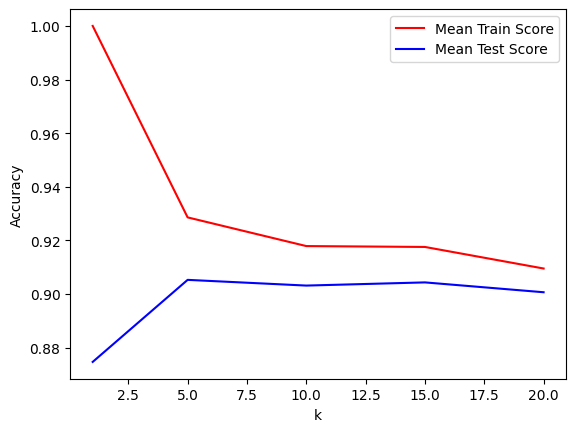

In [243]:
x_axis = cv_results['param_n_neighbors']
%matplotlib inline
plt.plot(x_axis, cv_results['mean_train_score'], label = 'Mean Train Score', c = 'r')
plt.plot(x_axis, cv_results['mean_test_score'], label = 'Mean Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [244]:
report_table = [['KNN', 'k = 5', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), f1_score(y_knn_train_predict, y_train), f1_score(y_knn_predict, y_test) ]]

### 2. Linear SVC

In [245]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_linear = SVC(kernel = 'linear') 
param_grid = {'C':[0.01, 0.1, 1, 10]}
print("Parameter grid for Linear SVC: {}".format(param_grid))

grid_svcLinear = GridSearchCV(svc_linear, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='f1', return_train_score=True)

Parameter grid for Linear SVC: {'C': [0.01, 0.1, 1, 10]}


In [246]:
grid_svcLinear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True,
             scoring='f1')

In [247]:
cv_results = pd.DataFrame.from_dict(grid_svcLinear.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

,param_C,mean_train_score,mean_test_score
0,0.01,0.356373,0.357988
1,0.1,0.792687,0.791942
2,1,0.883096,0.883862
3,10,0.911196,0.906611


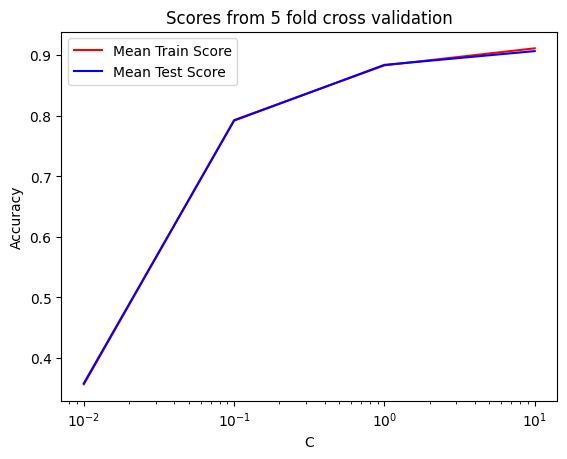

In [248]:
x_axis = cv_results['param_C']
plt.plot(x_axis, cv_results['mean_train_score'], c = 'r', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Scores from 5 fold cross validation')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [249]:
print("Best cross-validation score: {:.4f}".format(grid_svcLinear.best_score_))
print('Best penalty term:',grid_svcLinear.best_params_)
print("Training Score: {:.4f}".format(grid_svcLinear.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_svcLinear.score(X_test, y_test)))

Best cross-validation score: 0.9066
Best penalty term: {'C': 10}
Training Score: 0.9122
Testing Score: 0.9007


In [250]:
y_svcLinear_predict_train = grid_svcLinear.predict(X_train)
y_svcLinear_predict = grid_svcLinear.predict(X_test)

In [251]:
report_table = report_table + [['Linear SVC', 'C = 10', grid_svcLinear.score(X_train, y_train), grid_svcLinear.score(X_test, y_test), f1_score(y_svcLinear_predict_train, y_train), f1_score(y_svcLinear_predict, y_test)]]

### 3. Decision Tree

In [252]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='f1', return_train_score=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             return_train_score=True, scoring='f1')

In [253]:
grid_tree.best_params_

{'max_depth': 4}

In [254]:
y_dtree_predict_train = grid_tree.predict(X_train)
y_dtree_predict = grid_tree.predict(X_test)

In [255]:
report_table = report_table + [['Decision Tree', 'max_depth = 4', grid_tree.score(X_train, y_train), grid_tree.score(X_test, y_test), f1_score(y_dtree_predict_train, y_train), f1_score(y_dtree_predict, y_test)]]

In [256]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train F1 score', 'Test F1 score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train F1 score,Test F1 score
Model name,,,,,,
KNN,KNN,k = 5,0.928225,0.891057,0.928225,0.891057
Linear SVC,Linear SVC,C = 10,0.912169,0.900738,0.912169,0.900738
Decision Tree,Decision Tree,max_depth = 4,0.924261,0.906024,0.924261,0.906024
